In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from skimage.color import gray2rgb

import matplotlib.pyplot as plt

import sarpy as sp
from sarpy.datasets import load_mpeg7

import keras
import keras.applications.inception_v3 as inception
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def get_class_name(target):
    if target == 0: return "Bone"
    if target == 1: return "Comma"
    if target == 2: return "Glas"
    if target == 3: return "HCircle"
    if target == 4: return "Heart"
    if target == 5: return "Misk"
    if target == 6: return "apple"
    if target == 7: return "bat"
    if target == 8: return "beetle"
    if target == 9: return "bell"
    if target == 10: return "bird"
    if target == 11: return "bottle"
    if target == 12: return "brick"
    if target == 13: return "butterfly"
    if target == 14: return "camel"
    if target == 15: return "car"
    if target == 16: return "carriage"
    if target == 17: return "cattle"
    if target == 18: return "cellular_phone"
    if target == 19: return "chicken"
    if target == 20: return "children"
    if target == 21: return "chopper"
    if target == 22: return "classic"
    if target == 23: return "crown"
    if target == 24: return "cup"
    if target == 25: return "deer"
    if target == 26: return "device0"
    if target == 27: return "device1"
    if target == 28: return "device2"
    if target == 29: return "device3"
    if target == 30: return "device4"
    if target == 31: return "device5"
    if target == 32: return "device6"
    if target == 33: return "device7"
    if target == 34: return "device8"
    if target == 35: return "device9"
    if target == 36: return "dog"
    if target == 37: return "elephant"
    if target == 38: return "face"
    if target == 39: return "fish"
    if target == 40: return "flatfish"
    if target == 41: return "fly"
    if target == 42: return "fork"
    if target == 43: return "fountain"
    if target == 44: return "frog"
    if target == 45: return "guitar"
    if target == 46: return "hammer"
    if target == 47: return "hat"
    if target == 48: return "horse"
    if target == 49: return "horseshoe"
    if target == 50: return "jar"
    if target == 51: return "key"
    if target == 52: return "lizzard"
    if target == 53: return "lmfish"
    if target == 54: return "octopus"
    if target == 55: return "pencil"
    if target == 56: return "personal_car"
    if target == 57: return "pocket"
    if target == 58: return "rat"
    if target == 59: return "ray"
    if target == 60: return "sea_snake"
    if target == 61: return "shoe"
    if target == 62: return "spoon"
    if target == 63: return "spring"
    if target == 64: return "stef"
    if target == 65: return "teddy"
    if target == 66: return "tree"
    if target == 67: return "truck"
    if target == 68: return "turtle"
    if target == 69: return "watch"

In [3]:
# Loading dataset
dataset = load_mpeg7()
bitmaps, targets = dataset["bitmaps"][:140], dataset["targets"][:140]

number_of_classes = len(np.unique(targets))
print("Loaded dataset. {} examples, {} classes".format(len(bitmaps), number_of_classes))

# Normalizing images
image_size_height = image_size_width = 299
#bitmaps = [bitmap.normalize(image_size_height,image_size_width) for bitmap in bitmaps]
X = [image.img_to_array(gray2rgb(resize(bitmap.data, (299,299), mode="constant"))) for bitmap in bitmaps]
y = keras.utils.to_categorical(targets, num_classes=number_of_classes)

Loaded dataset. 140 examples, 7 classes


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
print("Split X and Y into train (shapes: {},{}) and test (shape: {},{})".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Split X and Y into train (shapes: (70, 299, 299, 3),(70, 7)) and test (shape: (70, 299, 299, 3),(70, 7))


In [5]:
# create the base pre-trained model, without top
base_model = inception.InceptionV3(weights='imagenet', include_top=False)

x = base_model.output

x = GlobalAveragePooling2D()(x)
# Fully-connected layer
x = Dense(1024, activation='relu')(x)
# Classes logistic layer -- with 70 classes
predictions = Dense(number_of_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(X_train,y_train,batch_size=32, epochs=10)

Epoch 1/10
70/70 [==============================] - 58s 834ms/step - loss: 4.9717
Epoch 2/10
70/70 [==============================] - 53s 758ms/step - loss: 7.8916
Epoch 3/10
70/70 [==============================] - 54s 775ms/step - loss: 5.9156
Epoch 4/10
70/70 [==============================] - 56s 793ms/step - loss: 4.0955
Epoch 5/10
70/70 [==============================] - 57s 813ms/step - loss: 4.1585
Epoch 6/10
70/70 [==============================] - 57s 812ms/step - loss: 3.0665
Epoch 7/10
70/70 [==============================] - 58s 829ms/step - loss: 3.0679
Epoch 8/10
70/70 [==============================] - 59s 836ms/step - loss: 1.9640
Epoch 9/10
70/70 [==============================] - 59s 845ms/step - loss: 2.3400
Epoch 10/10
70/70 [==============================] - 59s 837ms/step - loss: 0.2650


In [6]:
# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Score:", score)

70/70 [==============================] - 68s 970ms/step
Score: 0.545673149824


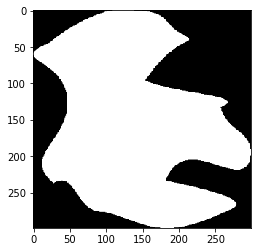

Predicted: Misk (True: Misk)


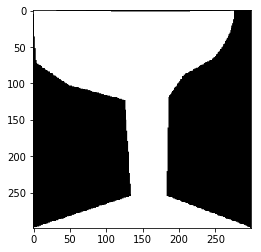

Predicted: Glas (True: Glas)


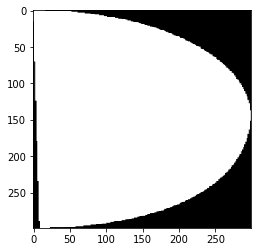

Predicted: HCircle (True: HCircle)


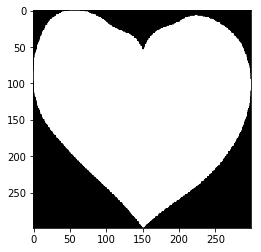

Predicted: Heart (True: Heart)


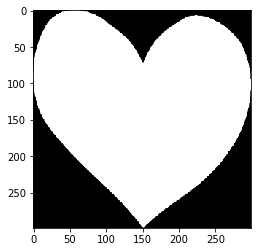

Predicted: Heart (True: Heart)


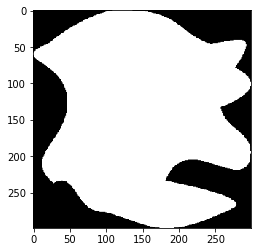

Predicted: Misk (True: Misk)


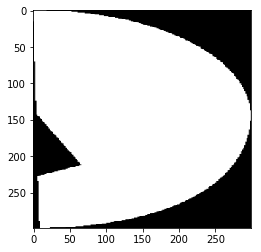

Predicted: HCircle (True: HCircle)


In [7]:
# Display some results
for test_image, test_target in zip(X_test[::int(len(X_test)/6)], y_test[::int(len(y_test)/6)]):
    # Predicting class
    predicted_class = model.predict(np.array([test_image]))[0]
    plt.imshow(test_image, cmap='gray')
    plt.show()
    print("Predicted: {} (True: {})".format(get_class_name(np.argmax(predicted_class)), get_class_name(np.argwhere(test_target)[0][0])))